# **Machine Learning Assignment 2**


### **Student Details:**
1. Athirah binti Omar (P129566)
2. Mohammad Wafiuddin bin Esa (P132415)
3. Kamarul Arifin Bin Musa (P132829)
4. A'zra Zulaikha Binti Zainol (P137262)
5. Nur Diana Binti Abdul Kahar (P137263)

In [1]:
#!pip install graphviz

In [2]:
#import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score, r2_score,precision_score

from scipy.stats import randint
from graphviz import Digraph

# Attributes for student-mat.csv (Math course) datasets:

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinhoda Silveira)

2 sex - student's sex (binary: 'F' - female or 'M' - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: 'U' - urban or 'R' - rural)

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

## These grades are related with the course subject Math:
31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)

In [3]:
df = pd.read_csv("student-mat.csv", sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# **Regression Tree**

In [5]:
# Select predicted and targeted columns

X = df.drop(['G1', 'G2', 'G3'], axis = 1)
X = pd.get_dummies(X, dtype=int, drop_first = True)
y1 = df.G1

# Split data into training and testing dataset

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, train_size = 0.8, random_state = 1)

In [6]:
## Define Grid
grid1 = grid1 = {'criterion': ['squared_error'],
         'max_depth': [2,3,4,5,6,7,8,9,10], 
         'min_samples_split': [2,3,4,5,6,7,8,9,10], 
         'min_samples_leaf': [1, 2, 3, 4, 5],  
         'random_state': [1]
        }

## Grid Search function
CV_rt = GridSearchCV(DecisionTreeRegressor(), grid1, cv=5)
CV_rt.fit(X_train, y1_train)

# Print the best hyperparameters found
print("Best hyperparameters:", CV_rt.best_params_)

Best hyperparameters: {'criterion': 'squared_error', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 1}


In [7]:
# Input the best hyperparameters into regression tree model
DTR = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 2,
                               min_samples_leaf =  2, min_samples_split = 2, random_state = 1)
DTR.fit(X_train, y1_train)


DecisionTreeRegressor(max_depth=2, min_samples_leaf=2, random_state=1)

In [8]:
# Evaluate the best model on the test set

y1_pred_train = DTR.predict(X_train)
y1_pred_test = DTR.predict(X_test)
mse1_train = mean_squared_error(y1_train, y1_pred_train)
mse1_test = mean_squared_error(y1_test, y1_pred_test)

print("MSE_train:", mse1_train)
print("RMSE_train: ", mse1_train**(1/2.0))
print("R2 score_train: ", r2_score(y1_train, y1_pred_train))
print("\n-----------\n")
print("MSE_test:", mse1_test)
print("RMSE_test: ", mse1_test**(1/2.0))
print("R2 score_test: ", r2_score(y1_test, y1_pred_test))

MSE_train: 9.544838694367366
RMSE_train:  3.089472235571533
R2 score_train:  0.15320336452875993

-----------

MSE_test: 7.4594640215069905
RMSE_test:  2.7312019371527603
R2 score_test:  0.24190661198135266


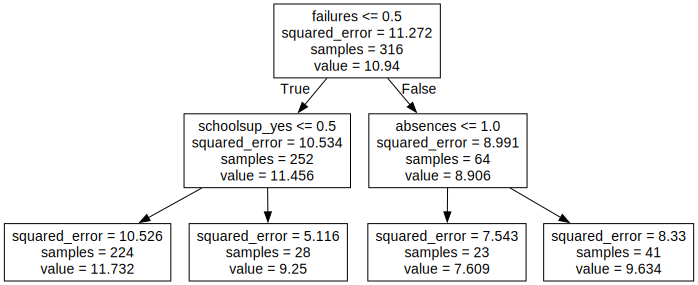

In [9]:
export_graphviz(DTR,
                out_file = "student_regtree.dot",
                feature_names = X_train.columns)

with open("student_regtree.dot") as f:
    dot_graph = f.read()

#graph = graphviz.Source(dot_graph)

#graph.render('student_regtree', format = 'png', cleanup = True)

graphviz.Source(dot_graph)

# **Classification Tree**

In [10]:
# Define a function to map the grades to the corresponding categories
def transform_G2(G2):
    if G2 <= 4:
        return 'E'
    elif G2 <= 8:
        return 'D'
    elif G2 <= 12:
        return 'C'
    elif G2 <= 16:
        return 'B'
    else:
        return 'A' # Handle any values outside the specified ranges if necessary

# Apply the map function to create the new variable 'G2T'
df['G2T'] = df['G2'].apply(transform_G2)

In [11]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G2T
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,D
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,D
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,D
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,C


In [12]:
X2 = df.drop(['G2','G2T','G3'], axis = 1)
X2 = pd.get_dummies(X2, dtype=int, drop_first = True)
y2 = df.G2T

# Split data into training and testing dataset

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.8, random_state = 1)

In [13]:
## Define Grid
grid2 = {'criterion': ['gini', 'entropy'],
         'max_depth': [2,3,4,5,6,7,8,9,10], 
         'min_samples_split': [2,3,4,5,6,7,8,9,10], 
         'min_samples_leaf': [1, 2, 3, 4, 5],  
         'random_state': [1]
}

## Grid Search function
CV_ct = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid2, cv= 5, scoring='accuracy')
CV_ct.fit(X2_train, y2_train)

# Print the best hyperparameters found
print("Best hyperparameters:", CV_ct.best_params_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 1}


In [14]:
# Input the best hyperparameters into classification tree model
DTC = DecisionTreeClassifier(criterion = 'gini', max_depth = 2,
                             min_samples_leaf =1, min_samples_split = 2, random_state = 1)
DTC.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [15]:
# Evaluate the model by checking the accuracy score

y2_pred_train = DTC.predict(X2_train)
y2_pred_test = DTC.predict(X2_test)
accuracy_train = accuracy_score(y2_train, y2_pred_train)
accuracy_test = accuracy_score(y2_test, y2_pred_test)
print("Accuracy score_train:", accuracy_train)
print("Accuracy score_test:", accuracy_test)

Accuracy score_train: 0.680379746835443
Accuracy score_test: 0.6582278481012658


In [16]:
# Predicting and accuracy check
cmd = pd.DataFrame(confusion_matrix(y2_test, y2_pred_test).T)
print(cmd)

   0   1   2   3
0  2   4   0   0
1  0  11   8   0
2  0   0  27   5
3  0   0  10  12


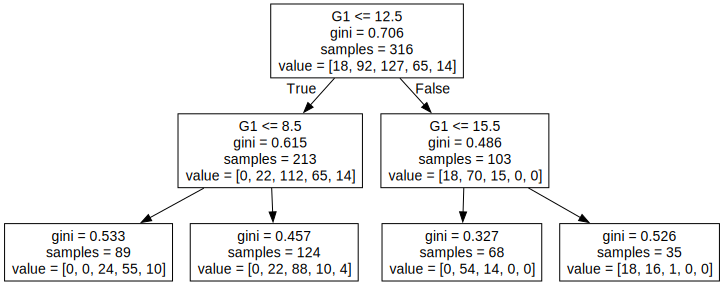

In [17]:
export_graphviz(DTC,
                out_file = "studentmat_tree.dot",
                feature_names = X2_train.columns)

with open("studentmat_tree.dot") as f:
    dot_graph = f.read()

#graph = graphviz.Source(dot_graph)

#graph.render('studentmat_tree', format = 'png', cleanup = True)
    
graphviz.Source(dot_graph)

# **Random Forest**

In [18]:
X3 = df.drop(['G2T', 'G3'], axis = 1)
X3 = pd.get_dummies(X3, dtype=int, drop_first = True)
y3 = df.G3

# Split data into training and testing dataset

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, train_size = 0.8, random_state = 1)

In [19]:
## Define Grid
grid3 = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [2,4,6,8,10],
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf': [1,3,5],
    'random_state': [1]
}

## Grid Search function
CV_rfr = GridSearchCV(RandomForestRegressor(), grid3, cv= 5)
CV_rfr.fit(X3_train, y3_train)

# Print the best hyperparameters found
print("Best hyperparameters:", CV_rfr.best_params_)

Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 1}


In [20]:
RFR = RandomForestRegressor(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1,
                            max_features = 'sqrt', max_depth = 10, random_state = 1,)

RFR.fit(X3_train, y3_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=200,
                      random_state=1)

In [21]:
y3_pred_train = RFR.predict(X3_train)
y3_pred_test = RFR.predict(X3_test)
mse3_train = mean_squared_error(y3_train, y3_pred_train)
mse3_test = mean_squared_error(y3_test, y3_pred_test)

print("MSE_train:", mse3_train)
print("RMSE_train: ", mse3_train**(1/2.0))
print("R2 score_train: ", r2_score(y3_train, y3_pred_train))
print("\n-----------\n")
print("MSE_test:", mse3_test)
print("RMSE_test: ", mse3_test**(1/2.0))
print("R2 score_test: ", r2_score(y3_test, y3_pred_test))

MSE_train: 0.7843145547805317
RMSE_train:  0.8856153537402859
R2 score_train:  0.9655268808356435

-----------

MSE_test: 2.7648492813010543
RMSE_test:  1.6627835942482276
R2 score_test:  0.7977706166397127


In [22]:
importances = RFR.feature_importances_
feature_names = X3.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by = 'Importance', ascending = False)

print("Variable Importance from Random Forest:")
print(importance_df)

Variable Importance from Random Forest:
              Feature  Importance
14                 G2    0.354276
13                 G1    0.216034
12           absences    0.071744
5            failures    0.034973
0                 age    0.021594
8               goout    0.018802
1                Medu    0.018513
2                Fedu    0.016539
4           studytime    0.015944
11             health    0.015914
7            freetime    0.015423
10               Walc    0.015188
6              famrel    0.013962
3          traveltime    0.012927
38         higher_yes    0.009476
33      schoolsup_yes    0.009401
40       romantic_yes    0.009018
16              sex_M    0.008511
30  reason_reputation    0.007722
9                Dalc    0.007576
35           paid_yes    0.007037
22      Mjob_services    0.007036
36     activities_yes    0.006803
28        reason_home    0.006673
21         Mjob_other    0.006307
32     guardian_other    0.006212
34         famsup_yes    0.006052
37      

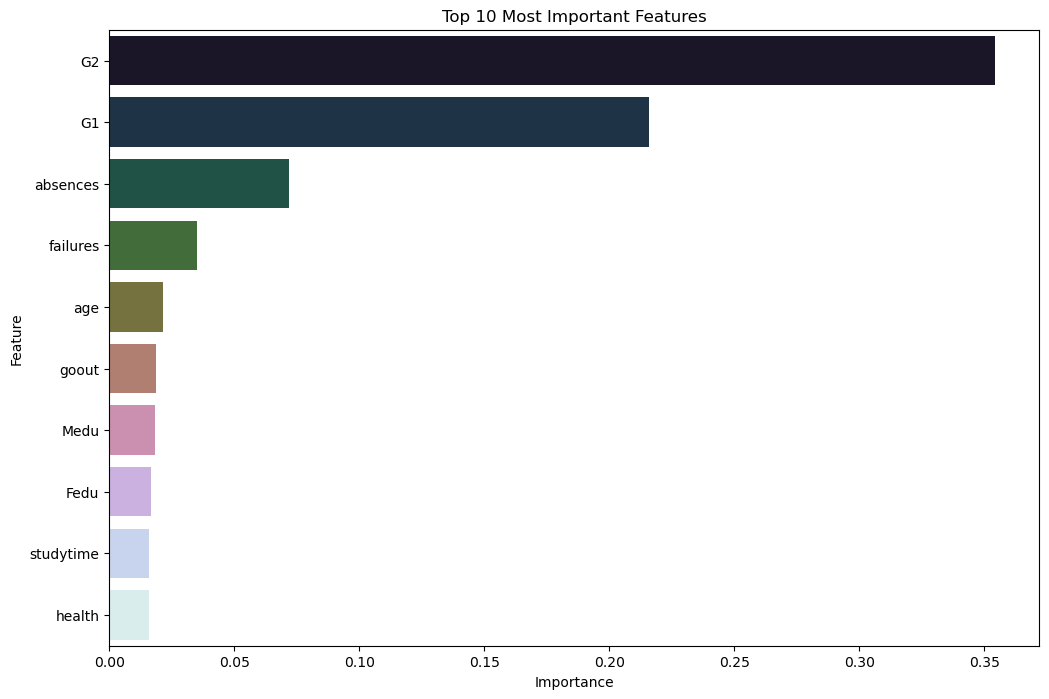

In [23]:
top_10_features = importance_df.head(10)

plt.figure(figsize = (12,8))
sns.barplot(data = top_10_features, y = top_10_features['Feature'], x = top_10_features['Importance'],
            palette = 'cubehelix')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')

#plt.savefig('top_10_most_important_figure.png', bbox_inches =  'tight')

plt.show()